In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
sys.path.append('../RunAnova')

from RunAnova import OneWayAnova
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
resp_var = 'age'
treatment = 'company'
experiment = {'NASA' : [18,19,20,21,22,23,18,19,20,21],
             'Tesla' : [18,20,16,20,21,20,18,19,17,13], 
             'Orange' : [21,22,17,18,22,19,21,20,18,23]}

exp_df = pd.DataFrame(experiment)
exp_df.index.name = "observation"
exp_df

,NASA,Tesla,Orange
observation,,,
0,18,18,21
1,19,20,22
2,20,16,17
3,21,20,18
4,22,21,22
5,23,20,19
6,18,18,21
7,19,19,20
8,20,17,18


For a level of confidence of 0.95


,Treatment,Mean,Std error,CI
1,Tesla,18.2,0.76,"[16.49, 19.91]"
0,NASA,20.1,0.53,"[18.91, 21.29]"
2,Orange,20.1,0.64,"[18.65, 21.55]"


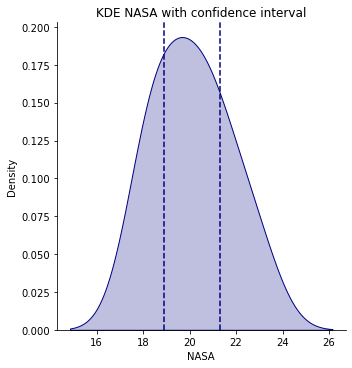

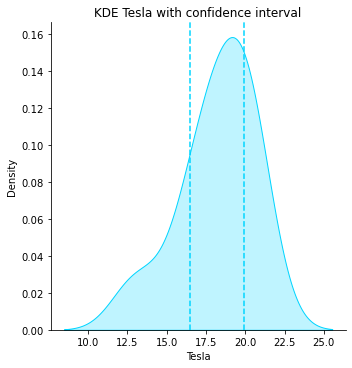

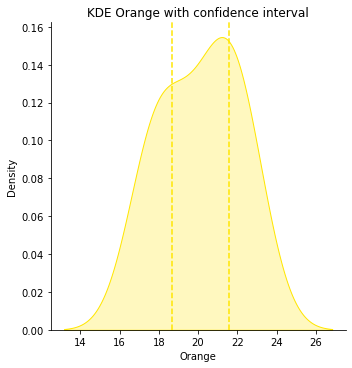

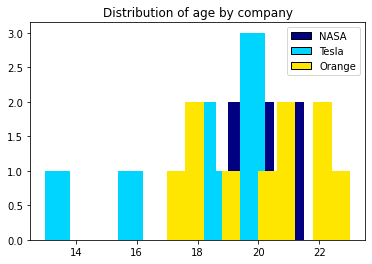

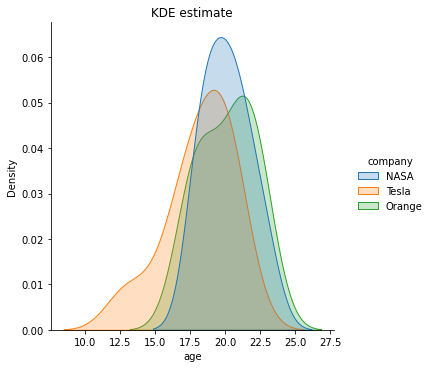

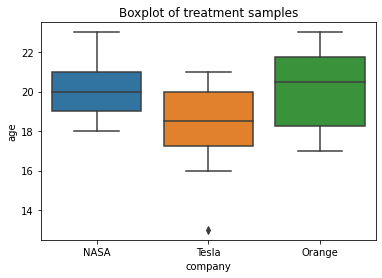

In [9]:
anova_proc = OneWayAnova(exp_df, resp_var=resp_var, treatments=treatment)
anova_proc.show_distribution()

For a level of confidence of 0.95


,Treatment,Mean,Std error,CI
1,Tesla,18.2,0.76,"[16.49, 19.91]"
0,NASA,20.1,0.53,"[18.91, 21.29]"
2,Orange,20.1,0.64,"[18.65, 21.55]"


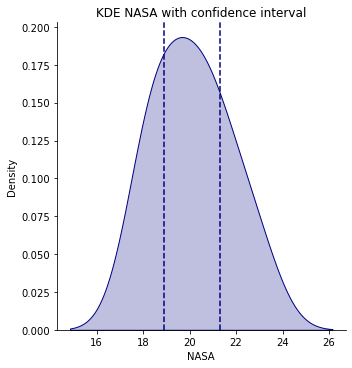

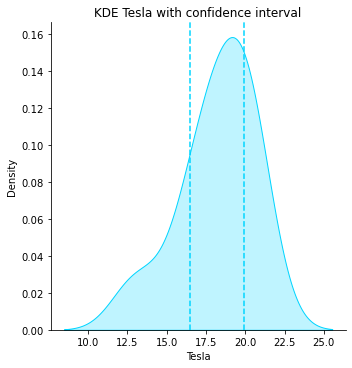

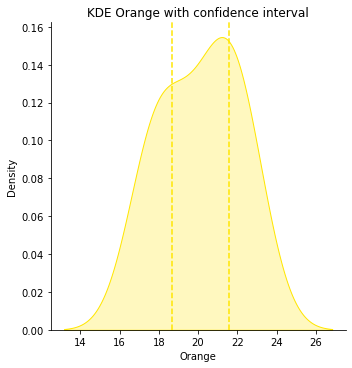

In [10]:
anova_proc.compute_indep_ci(0.95, show=True)

###### Run Qqplot test ###### 



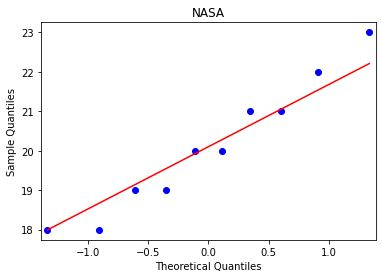

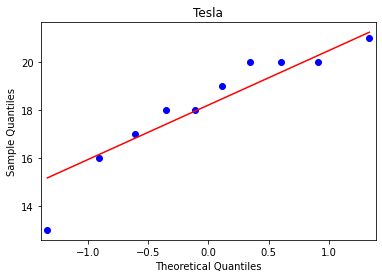

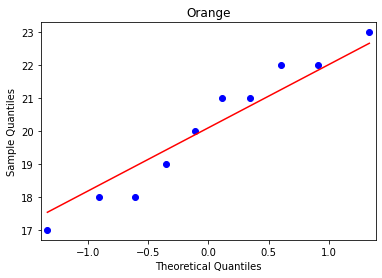

###### Run Shapiro test ###### 

If p > 0.05 we fail to reject null hypoteshsi -> Gaussian
NASA statistics=0.948, p=0.646
Tesla statistics=0.905, p=0.250
Orange statistics=0.944, p=0.596
###### Run Levene test ###### 

If p-value >0.05 non-statistically significant difference in their varability
statistics=0.500, p=0.612


In [11]:
anova_proc.normality_test(test_type="qqplot")
anova_proc.normality_test(test_type="shapiro")
anova_proc.normality_test(test_type="levene")


In [12]:
anova_proc.run_anova(simple=False)

##### Decomposition of variance #####
Grand Mean 19.47
SST: 24.07, dof k-1:  2, MST: 12.03
SSE: 24.07, dof n-k:  27, MSE: 4.20
TSS=SST+SSE total variation: 137.47, DOF: 29
##### Testing #####
Test statistic: F=MST/MSE=2.87
F_alpha: 3.35 for a level of confidence of 0.05
We fail to reject the null hypothesis
P-value: 0.0744
eta squared: 0.18 omega_squared: 24.01
